# Lemonade exercises

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## get the data set

In [2]:
def get_lemonade_data(query_url = False):
    #filename constants
    filename = 'lemonade.csv'
    url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'
    #check for file existence
    if os.path.isfile(filename) and not query_url:
        #return dataframe from file
        print('Returning saved csv files.')
        #return files
        df = pd.read_csv(filename).drop(columns = ['Unnamed: 0'])
        return df
    else:
        #get data from url
        print('Getting data from url...')
        df = pd.read_csv(url)
        print('Saving to .csv files...')
        #save data to csv.
        df.to_csv(filename)
        print('Returned dataframes.')
        #return to user
        return df
    
df = get_lemonade_data()

Returning saved csv files.


In [3]:
df.sample(3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
85,3/27/17,Monday,60.5,0.74,30,0.5,25
128,5/9/17,Tuesday,71.3,0.63,56,0.5,31
52,2/22/17,Wednesday,47.7,0.95,36,0.5,19


1. Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [19]:
def get_outlier_bounds(col, k):
    # k is the multiplier for the IQR rule
    sigma = col.std()
    q_one = col.describe()['50%']
    q_three = col.describe()['75%']
    upper_bound = q_three + k*sigma
    lower_bound = q_one - k*sigma
    return lower_bound, upper_bound

def flag_column_outliers(df, col_name, k):
    lower_bound, upper_bound = get_outlier_bounds(df[col_name], k)
    df[f"outlier_{col_name}"] = "not_outlier"
    df.loc[df[col_name] < lower_bound, f"outlier_{col_name}_{k}"] = "lower_outlier"
    df.loc[df[col_name] > upper_bound, f"outlier_{col_name}"] = "upper_outlier"
    return df

### For temperature

In [20]:
lower, upper = get_outlier_bounds(df['Temperature'], 1.5)

Text(0.5, 1.0, 'Histogram of Temperature with lower bounds (k=1.5) hued')

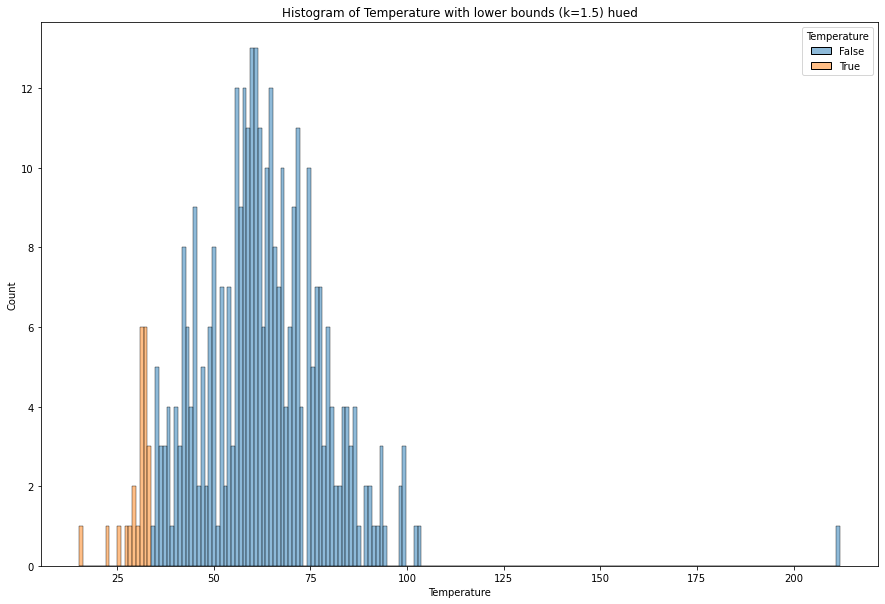

In [28]:
plt.figure(figsize=(15,10))
sns.histplot(x=df['Temperature'], hue=df['Temperature'] < lower, bins = 200)
plt.title('Histogram of Temperature with lower bounds (k=1.5) hued')

These most likely are not outliers, depending on where the location is

Text(0.5, 1.0, 'Histogram of Temperature with upper bounds (k=1.5) hued')

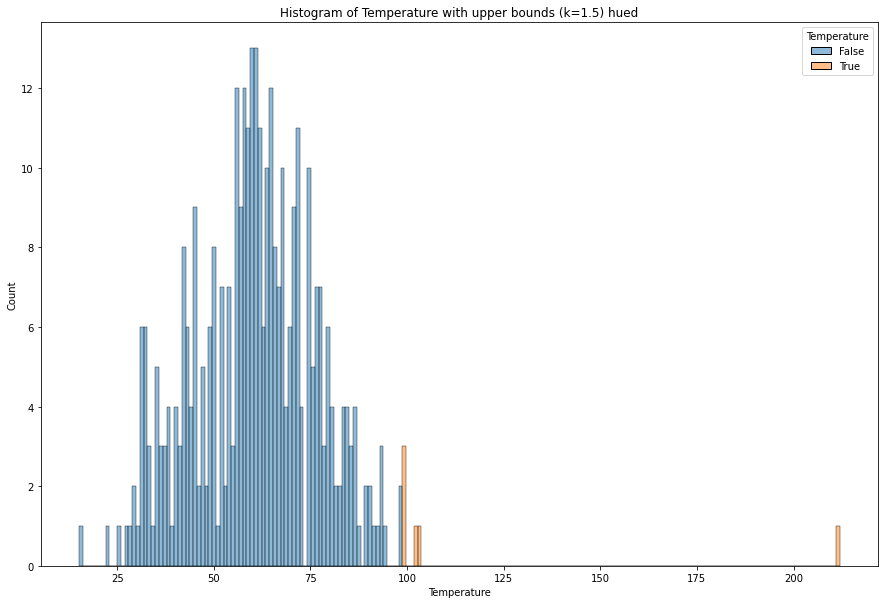

In [27]:
plt.figure(figsize=(15,10))
sns.histplot(x=df['Temperature'], hue=df['Temperature'] > upper, bins = 200)
plt.title('Histogram of Temperature with upper bounds (k=1.5) hued')

The upper bounds above 200 are definitely an outlier.  The ones right around 100 are probably not true outliers for temperature

In [29]:
lower_three, upper_three = get_outlier_bounds(df['Temperature'], 3)

Text(0.5, 1.0, 'Histogram of Temperature with lower bounds (k=3) hued')

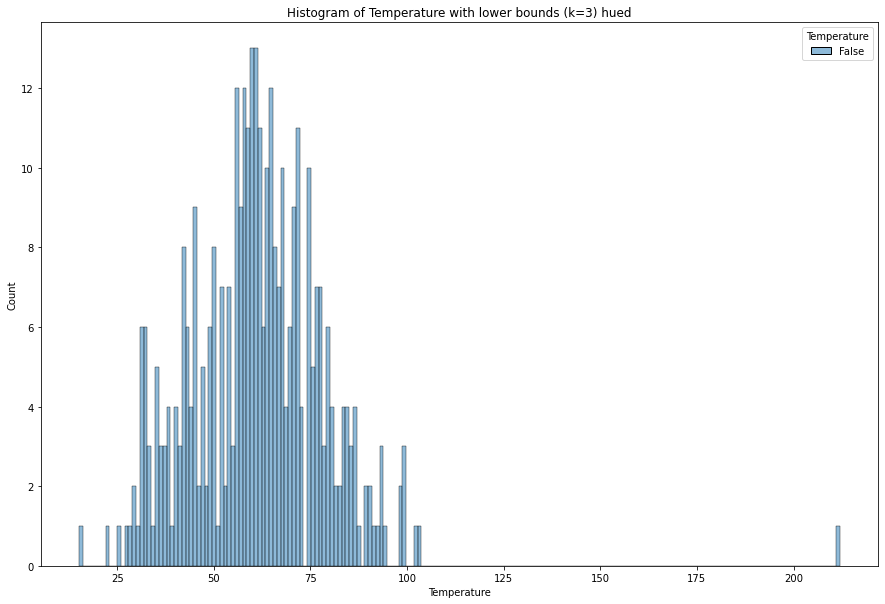

In [30]:
plt.figure(figsize=(15,10))
sns.histplot(x=df['Temperature'], hue=df['Temperature'] < lower_three, bins = 200)
plt.title('Histogram of Temperature with lower bounds (k=3) hued')

Text(0.5, 1.0, 'Histogram of Temperature with upper bounds (k=3) hued')

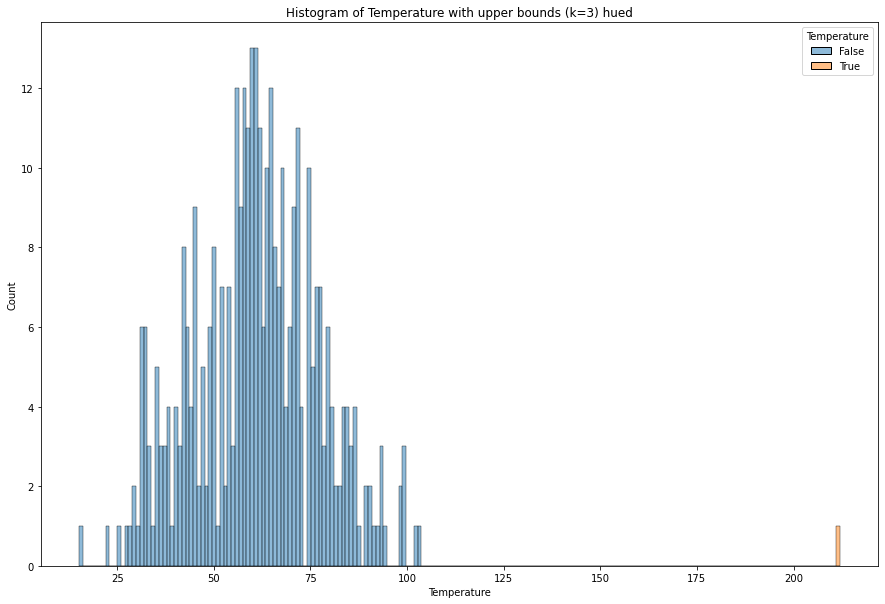

In [31]:
plt.figure(figsize=(15,10))
sns.histplot(x=df['Temperature'], hue=df['Temperature'] > upper_three, bins = 200)
plt.title('Histogram of Temperature with upper bounds (k=3) hued')

Only the upper one is a real outlier in terms of temp.  I think this would be a world record if it was a real measurement

## For rainfall

Text(0.5, 0.98, 'Histogram of Temperature with upper and lower bounds (k=1.5) hued')

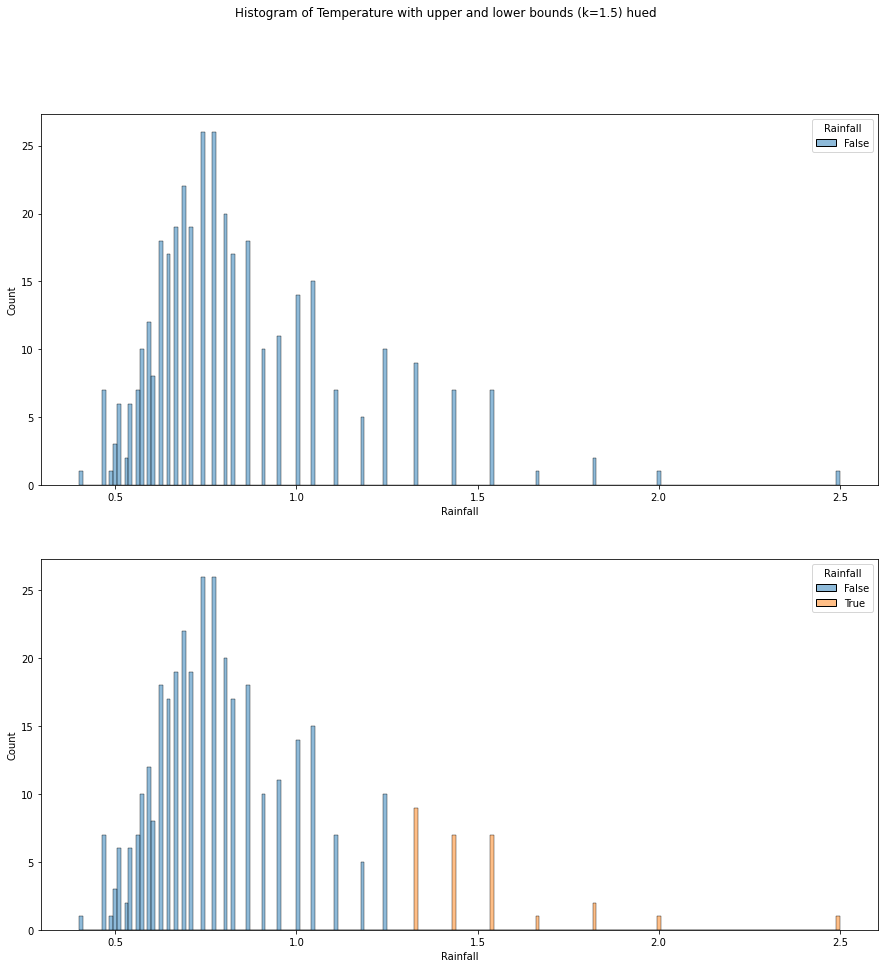

In [44]:
lower, upper = get_outlier_bounds(df['Rainfall'], 1.5)

fig, axes = plt.subplots(2, 1, figsize=(15,15))

sns.histplot(x=df['Rainfall'], hue=df['Rainfall'] < lower, bins = 200, ax= axes[0])
sns.histplot(x=df['Rainfall'], hue=df['Rainfall'] > upper, bins = 200, ax= axes[1])
fig.suptitle('Histogram of Rainfall with upper and lower bounds (k=1.5) hued')

Text(0.5, 0.98, 'Histogram of Temperature with upper and lower bounds (k=3) hued')

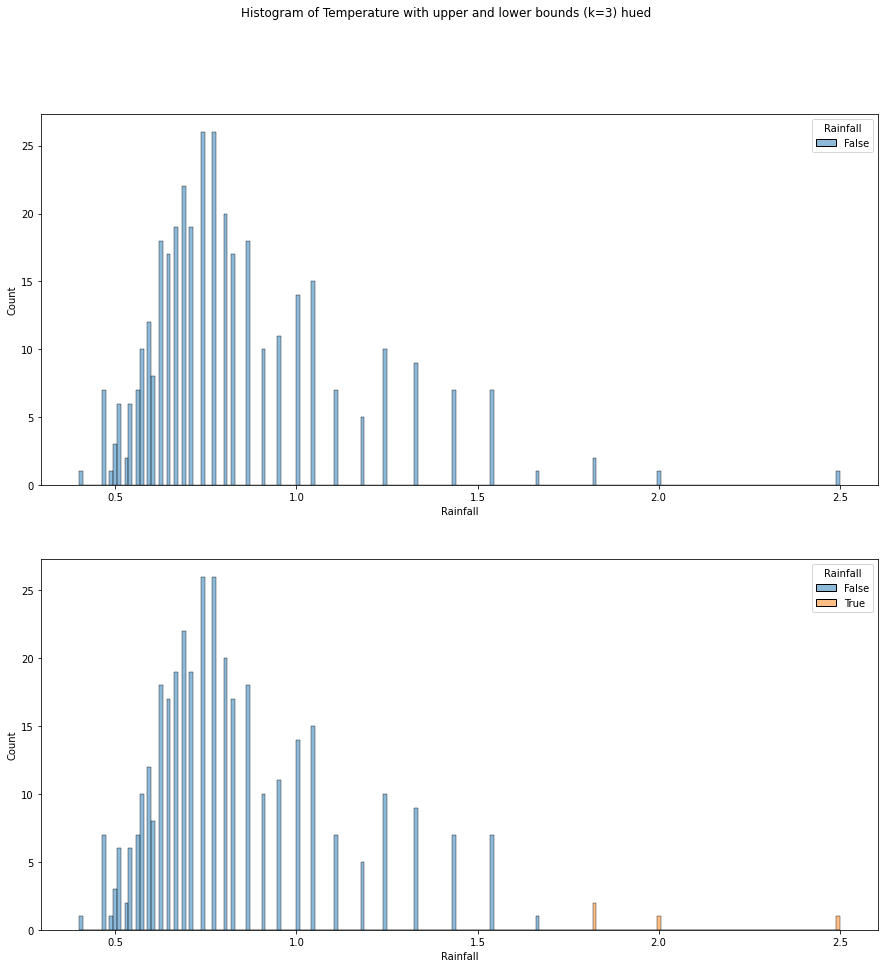

In [45]:
lower, upper = get_outlier_bounds(df['Rainfall'], 3)

fig, axes = plt.subplots(2, 1, figsize=(15,15))

sns.histplot(x=df['Rainfall'], hue=df['Rainfall'] < lower, bins = 200, ax= axes[0])
sns.histplot(x=df['Rainfall'], hue=df['Rainfall'] > upper, bins = 200, ax= axes[1])
fig.suptitle('Histogram of Rainfall with upper and lower bounds (k=3) hued')

There are no lower bound for either k, only upper bounds.  Doubtful these are anamolous, depending on the unit, but I'm assuming it's inches (in which case, this is fine).

## flyers

Text(0.5, 0.98, 'Histogram of flyers with upper and lower bounds (k=1.5) hued')

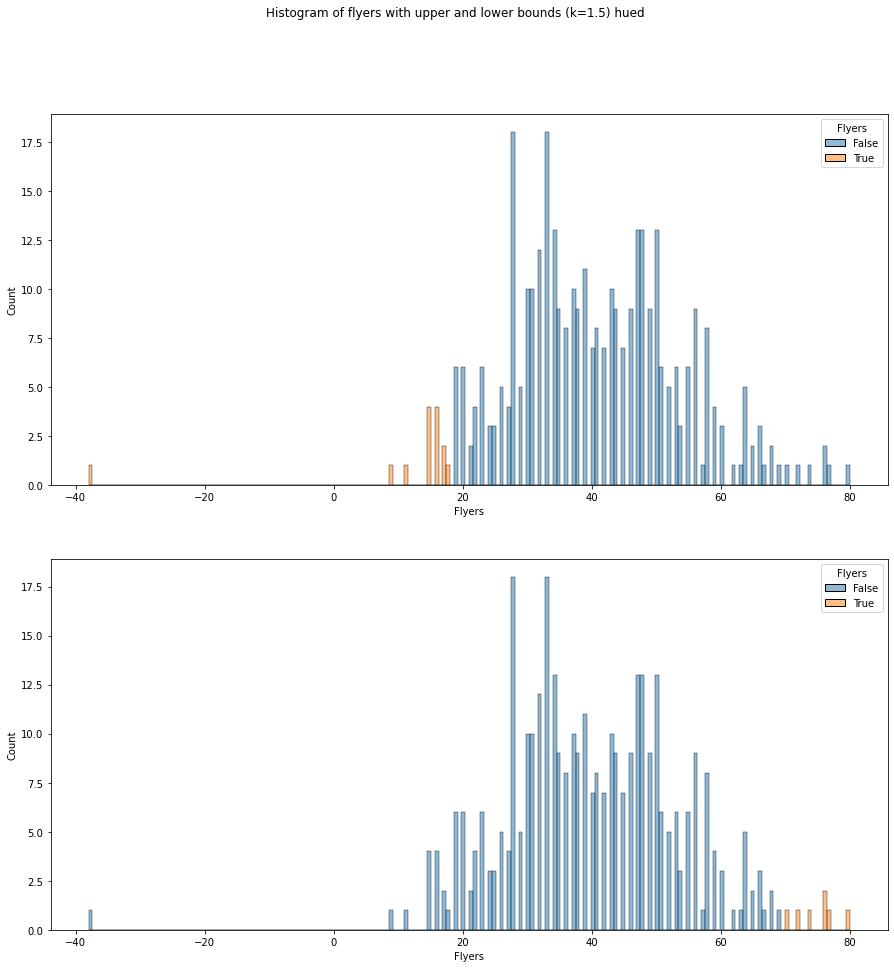

In [46]:
lower, upper = get_outlier_bounds(df['Flyers'], 1.5)

fig, axes = plt.subplots(2, 1, figsize=(15,15))

sns.histplot(x=df['Flyers'], hue=df['Flyers'] < lower, bins = 200, ax= axes[0])
sns.histplot(x=df['Flyers'], hue=df['Flyers'] > upper, bins = 200, ax= axes[1])
fig.suptitle('Histogram of flyers with upper and lower bounds (k=1.5) hued')

Text(0.5, 0.98, 'Histogram of flyers with upper and lower bounds (k=3) hued')

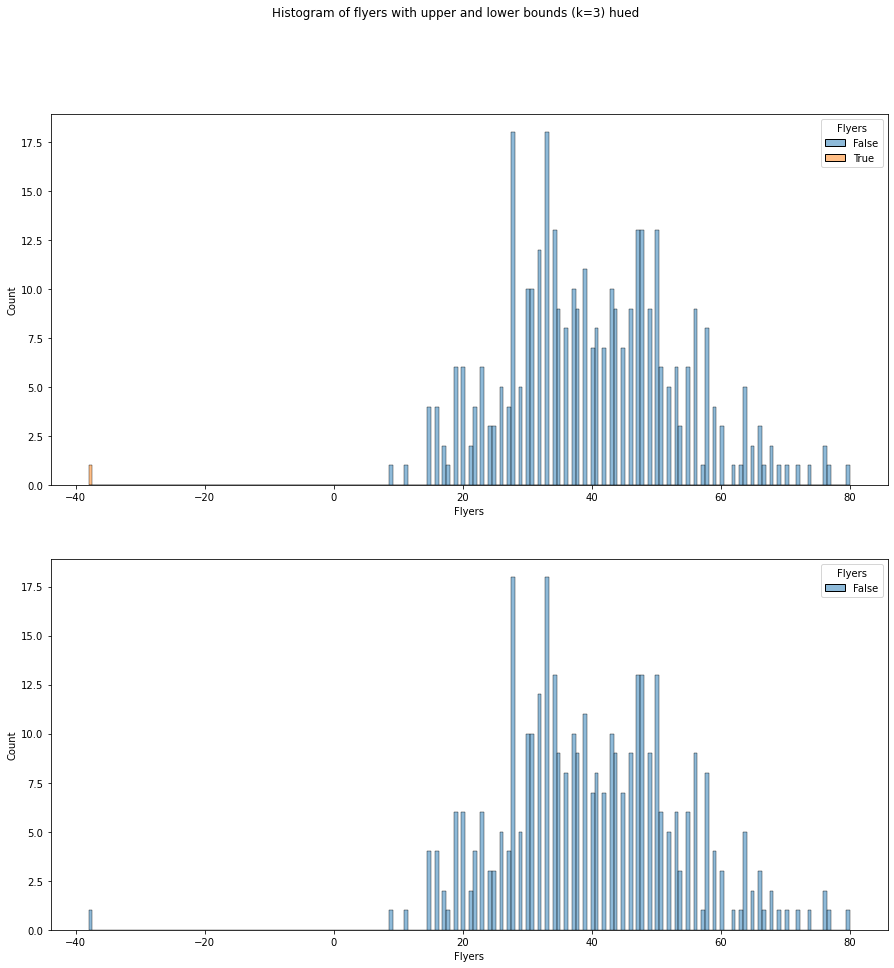

In [47]:
lower, upper = get_outlier_bounds(df['Flyers'], 3)

fig, axes = plt.subplots(2, 1, figsize=(15,15))

sns.histplot(x=df['Flyers'], hue=df['Flyers'] < lower, bins = 200, ax= axes[0])
sns.histplot(x=df['Flyers'], hue=df['Flyers'] > upper, bins = 200, ax= axes[1])
fig.suptitle('Histogram of flyers with upper and lower bounds (k=3) hued')

There cannot be negative flyers handed out, -40 is a true outlier.  80 seems like a realistic number however

## For price

Text(0.5, 0.98, 'Histogram of price with upper and lower bounds (k=1.5) hued')

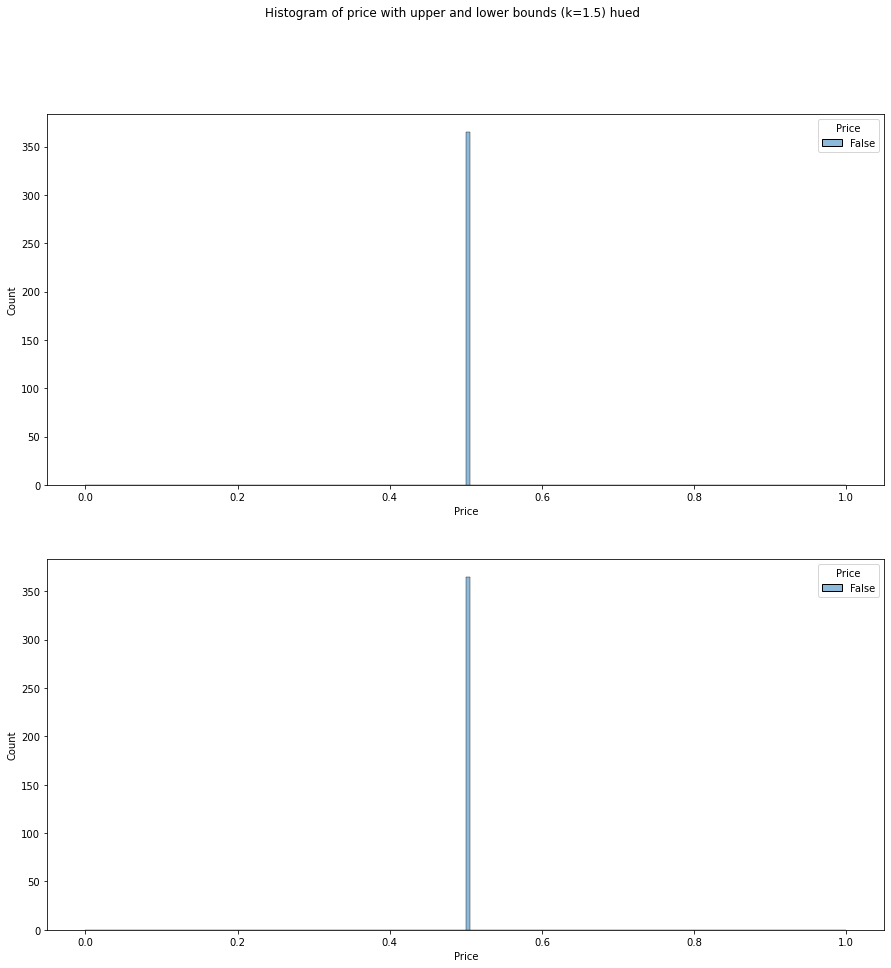

In [48]:
lower, upper = get_outlier_bounds(df['Price'], 1.5)

fig, axes = plt.subplots(2, 1, figsize=(15,15))

sns.histplot(x=df['Price'], hue=df['Price'] < lower, bins = 200, ax= axes[0])
sns.histplot(x=df['Price'], hue=df['Price'] > upper, bins = 200, ax= axes[1])
fig.suptitle('Histogram of price with upper and lower bounds (k=1.5) hued')

No outliers.  And x3 won't change that

## for sales

Text(0.5, 0.98, 'Histogram of sales with upper and lower bounds (k=1.5) hued')

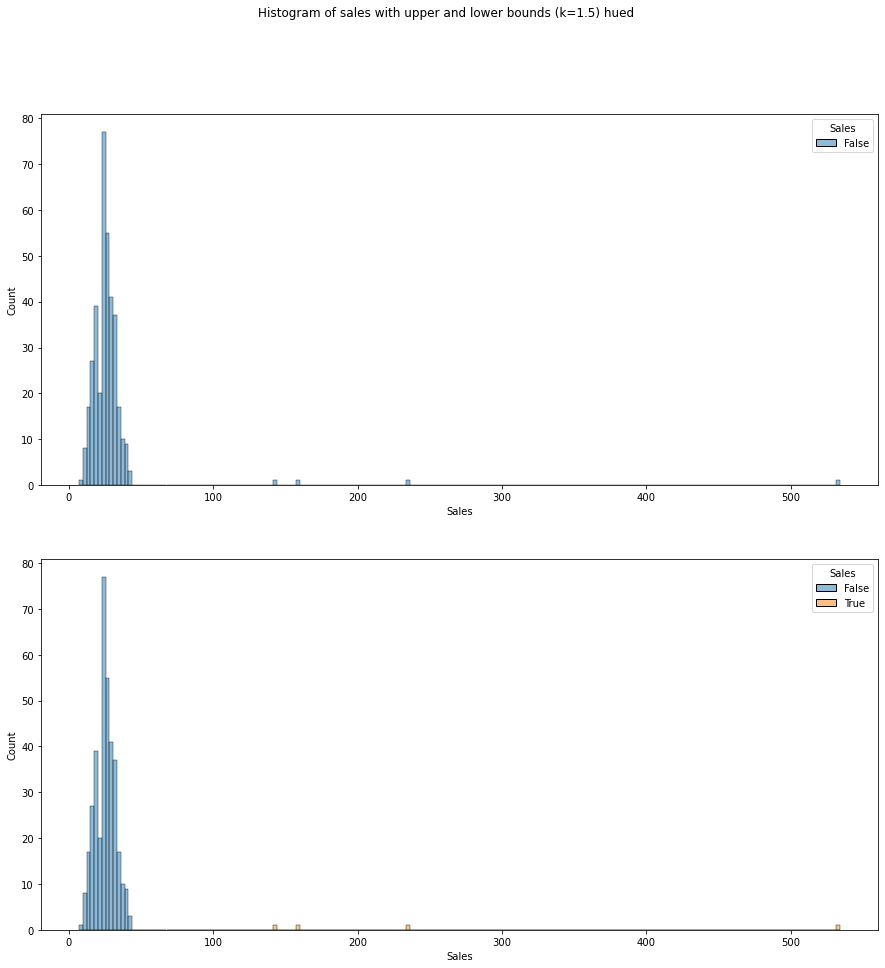

In [49]:
lower, upper = get_outlier_bounds(df['Sales'], 1.5)

fig, axes = plt.subplots(2, 1, figsize=(15,15))

sns.histplot(x=df['Sales'], hue=df['Sales'] < lower, bins = 200, ax= axes[0])
sns.histplot(x=df['Sales'], hue=df['Sales'] > upper, bins = 200, ax= axes[1])
fig.suptitle('Histogram of sales with upper and lower bounds (k=1.5) hued')

Text(0.5, 0.98, 'Histogram of sales with upper and lower bounds (k=3) hued')

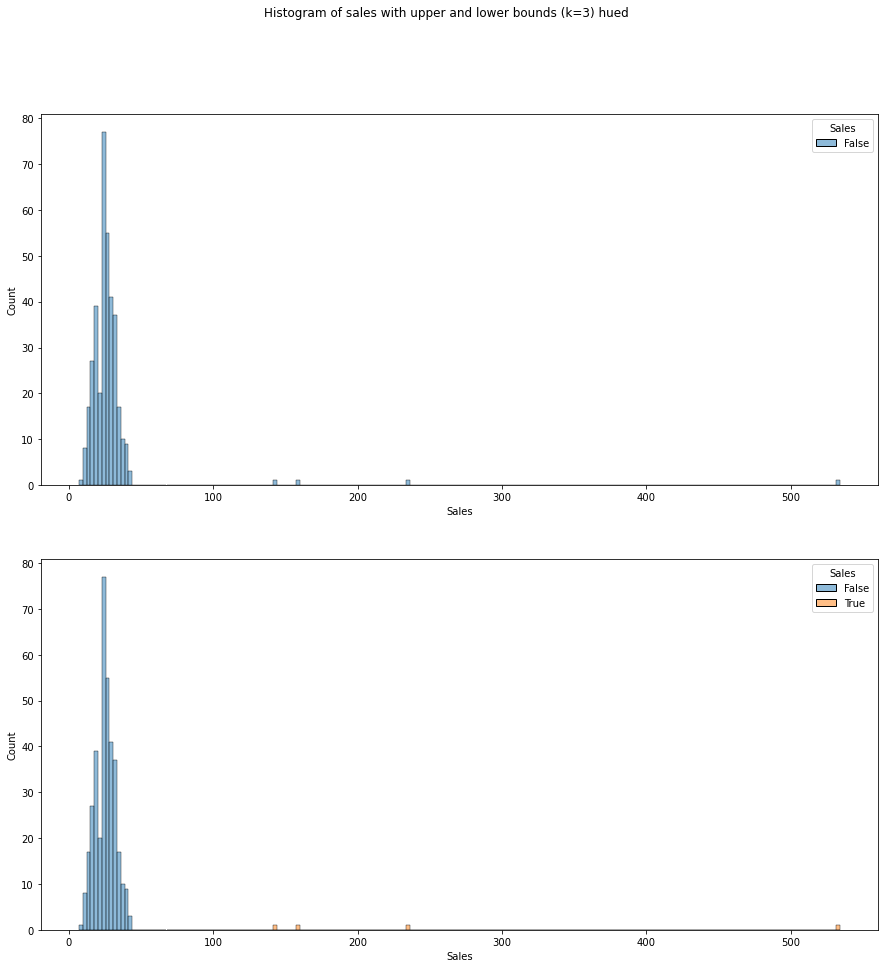

In [50]:
lower, upper = get_outlier_bounds(df['Sales'], 3)

fig, axes = plt.subplots(2, 1, figsize=(15,15))

sns.histplot(x=df['Sales'], hue=df['Sales'] < lower, bins = 200, ax= axes[0])
sns.histplot(x=df['Sales'], hue=df['Sales'] > upper, bins = 200, ax= axes[1])
fig.suptitle('Histogram of sales with upper and lower bounds (k=3) hued')

There are a lot of upper outliers.  Depending on what this business is like, this might be unusual.  Without context, this is hard to see if there are outliers.  I would assume that because these are so extreme they are true outliers.

## 2.

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

Use a 2 sigma decision rule to isolate the outliers.

Do these make sense?

Should certain outliers be kept or removed?


- everything but the price, day, and date looks normally distributed


### for temp

In [51]:
lower, upper = get_outlier_bounds(df['Temperature'], 2)

df[(df['Temperature'] < lower) | (df['Temperature'] > upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


212 degrees is a definite outlier. it should be removed.  the other two make sense

### for rainfall

In [52]:
lower, upper = get_outlier_bounds(df['Rainfall'], 2)

df[(df['Rainfall'] < lower) | (df['Rainfall'] > upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
15,1/16/17,Monday,30.6,1.67,24,0.5,12
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12
337,12/4/17,Monday,34.9,1.54,16,0.5,13
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
347,12/14/17,Thursday,31.9,1.54,24,0.5,13


None of these seem out of the normal, if the unit is in inches.

### for flyers

In [53]:
lower, upper = get_outlier_bounds(df['Flyers'], 2)

df[(df['Flyers'] < lower) | (df['Flyers'] > upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


There cannot be negative flyers.  But the others seem like they are reasonable.

### for sales

In [54]:
lower, upper = get_outlier_bounds(df['Sales'], 2)

df[(df['Sales'] < lower) | (df['Sales'] > upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


It is unclear whether these are extreme or not.  I suspect 534 is extreme; however, the others seem relatively reasonable.

## 3

Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [55]:
lower, upper = get_outlier_bounds(df['Temperature'], 3)

df[(df['Temperature'] < lower) | (df['Temperature'] > upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [56]:
lower, upper = get_outlier_bounds(df['Rainfall'], 3)

df[(df['Rainfall'] < lower) | (df['Rainfall'] > upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [57]:
lower, upper = get_outlier_bounds(df['Flyers'], 3)

df[(df['Flyers'] < lower) | (df['Flyers'] > upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [58]:
lower, upper = get_outlier_bounds(df['Sales'], 3)

df[(df['Sales'] < lower) | (df['Sales'] > upper)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534
